In [1]:
import math
def vert_coord(radius):
    
    print('radius = ', radius)
    
    scaler = radius
    m = (1+5**0.5)/2
    v0 = [1, 0, 0]
    v1 = [-1, 0, 0]
    v2 = [0, 1, 0]
    v3 = [0, -1, 0]
    v4 = [0, 0, 1]
    v5 = [0, 0, -1]
    VertCoord = [v0, v1, v2, v3, v4, v5]
    VertCoord_ = []
    for i in VertCoord:
        temp_list = []
        for j in i:
            temp = j*scaler
            temp_list.append(temp)
        VertCoord_.append(temp_list)
    return VertCoord_

if __name__ == '__main__':
    print(vert_coord(radius = 30))

radius =  30
[[30, 0, 0], [-30, 0, 0], [0, 30, 0], [0, -30, 0], [0, 0, 30], [0, 0, -30]]


In [3]:
def distance(a, b):
    # a seperated function for calculating the distance between two coordinates
    n = 15
    return round(((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)**0.5, n)

if __name__ == '__main__':
    coord = vert_coord(radius = 30)
    print('radius = ', distance([0, 0, 0], coord[0]))
    print('edge length = ', distance(coord[0], coord[2]))

radius =  30
radius =  30.0
edge length =  42.42640687119285


In [4]:
def mid_pt(a, b):
    # this is a seperate function for calculating mid point of two coords
    n = 15
    return [round((a[0]+b[0])/2, n), round((a[1]+b[1])/2, n), round((a[2]+b[2])/2, n)]

if __name__ == '__main__':
    print(mid_pt([1, 2, 3], [4, 5, 6]))

[2.5, 3.5, 4.5]


In [8]:
from numpy import *

def COM_leg(COM, a, b, c, d):
    lega = mid_pt(COM, a)
    legb = mid_pt(COM, b)
    legc = mid_pt(COM, c)
    legd = mid_pt(COM, d)
    return [around(COM, 10), around(lega, 10), around(legb, 10), around(legc, 10), around(legd, 10)]

if __name__ == '__main__':
    coord = vert_coord(radius = 30)
    print(COM_leg(coord[1], coord[2], coord[4], coord[3], coord[5]))

radius =  30
[array([-30,   0,   0]), array([-15.,  15.,   0.]), array([-15.,   0.,  15.]), array([-15., -15.,   0.]), array([-15.,   0., -15.])]


In [9]:
def COM_leg_gen(radius):
    coord = vert_coord(radius)
    COM_leg_list = []
    COM_leg_list.append(COM_leg(coord[0], coord[2], coord[4], coord[3], coord[5]))
    COM_leg_list.append(COM_leg(coord[1], coord[2], coord[4], coord[3], coord[5]))
    COM_leg_list.append(COM_leg(coord[2], coord[1], coord[5], coord[0], coord[4]))
    COM_leg_list.append(COM_leg(coord[3], coord[1], coord[5], coord[0], coord[4]))
    COM_leg_list.append(COM_leg(coord[4], coord[1], coord[2], coord[0], coord[3]))
    COM_leg_list.append(COM_leg(coord[5], coord[1], coord[2], coord[0], coord[3]))
    
    return COM_leg_list

def COM_leg_valid(radius):
    COM_leg_list = COM_leg_gen(radius)
    leg_pool = []
    count = 0
    for i in COM_leg_list:
        for j in range(len(i)):
            if j != 0:
                if list(i[j]) not in leg_pool:
                    count += 1
                    leg_pool.append(list(i[j]))
    print('Number of leg = ', count, '(should be 12)')

if __name__ == '__main__':
    COM_leg_valid(radius = 30)

radius =  30
Number of leg =  12 (should be 12)


In [15]:
def leg_reduce(COM, leg, sigma):   
    red_len = sigma/2
    ratio = 1 - red_len/distance(COM, leg)
    leg_red = []
    for i in range(0, 3):
        leg_red.append(round((leg[i] - COM[i])*ratio + COM[i], 8))
    return leg_red
                
def leg_reduce_valid(a, b, c, d, sigma):
    # validate the reduced length of legs is correct
    n = 7
    result_1 = leg_reduce(a, b, sigma)
    result_2 = leg_reduce(c, d, sigma)
    dis = distance(result_1, result_2)
    print('Actual distance: ', round(dis, 7))
    print('Assigned sigma: ', sigma)
    if round(dis, n) == sigma:
        print('Result match!\n')
    else:
        print('Result does not match!\n')

if __name__ == '__main__':
    coord = COM_leg_gen(radius = 30)
    leg_reduce_valid(coord[0][0], coord[0][2], coord[4][0], coord[4][3], 1)
    leg_reduce_valid(coord[1][0], coord[1][1], coord[2][0], coord[2][1], 2)
    leg_reduce_valid(coord[3][0], coord[3][2], coord[5][0], coord[5][4], 5)

radius =  30
Actual distance:  1.0
Assigned sigma:  1
Result match!

Actual distance:  2.0
Assigned sigma:  2
Result match!

Actual distance:  5.0
Assigned sigma:  5
Result match!



In [20]:
def leg_reduce_coor_gen(radius, sigma):
    # Generating all the coords of COM and legs when sigma exists
    COM_leg_list = COM_leg_gen(radius)
    COM_leg_red_list = []
    for elements in COM_leg_list:
        temp_list = []
        temp_list.append(elements[0])
        i = 1
        while i <= 4:
            temp_list.append(leg_reduce(elements[0], elements[i], sigma))
            i += 1
        COM_leg_red_list.append(temp_list)
    print('Number of elements in list: ', len(COM_leg_red_list), '(should be 6)\n')
    return COM_leg_red_list

if __name__ == '__main__':
    result = leg_reduce_coor_gen(radius = 30, sigma = 1)
    for i in result:
        print(i, '\n')

radius =  30
Number of elements in list:  6 (should be 6)

[array([30,  0,  0]), [15.35355339, 14.64644661, 0.0], [15.35355339, 0.0, 14.64644661], [15.35355339, -14.64644661, 0.0], [15.35355339, 0.0, -14.64644661]] 

[array([-30,   0,   0]), [-15.35355339, 14.64644661, 0.0], [-15.35355339, 0.0, 14.64644661], [-15.35355339, -14.64644661, 0.0], [-15.35355339, 0.0, -14.64644661]] 

[array([ 0, 30,  0]), [-14.64644661, 15.35355339, 0.0], [0.0, 15.35355339, -14.64644661], [14.64644661, 15.35355339, 0.0], [0.0, 15.35355339, 14.64644661]] 

[array([  0, -30,   0]), [-14.64644661, -15.35355339, 0.0], [0.0, -15.35355339, -14.64644661], [14.64644661, -15.35355339, 0.0], [0.0, -15.35355339, 14.64644661]] 

[array([ 0,  0, 30]), [-14.64644661, 0.0, 15.35355339], [0.0, 14.64644661, 15.35355339], [14.64644661, 0.0, 15.35355339], [0.0, -14.64644661, 15.35355339]] 

[array([  0,   0, -30]), [-14.64644661, 0.0, -15.35355339], [0.0, 14.64644661, -15.35355339], [14.64644661, 0.0, -15.35355339], [0.0, -14

radius =  30
Number of elements in list:  6 (should be 6)



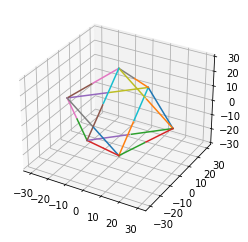

In [21]:
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.pyplot as plt  
 
# visualize the model
def sig_vis(list, ax):
    for i in range(1, 5):
        figure = ax.plot([list[0][0], list[i][0]], [list[0][1], list[i][1]], [list[0][2], list[i][2]])

def vis(lst):
    fig = plt.figure(1)  
    ax = fig.gca(projection='3d')
    for element in lst:
        sig_vis(element, ax) 
    plt.show()

if __name__ == '__main__':
    lst = leg_reduce_coor_gen(radius = 30, sigma = 1)
    vis(lst)

In [24]:
# import numpy as np

# # calculating the 5 angles according to the coords of legs and COM
# # see SI of the NERDSS paper II part for detail
# def angle_cal(COM1, leg1, COM2, leg2):
#     n = 8
#     c1 = np.array(COM1)
#     p1 = np.array(leg1)
#     c2 = np.array(COM2)
#     p2 = np.array(leg2)
#     v1 = p1 - c1
#     v2 = p2 - c2
#     sig1 = p1 - p2
#     sig2 = -sig1
#     theta1 = round(math.acos(np.dot(v1, sig1)/(np.linalg.norm(v1)*np.linalg.norm(sig1))), n)
#     theta2 = round(math.acos(np.dot(v2, sig2)/(np.linalg.norm(v2)*np.linalg.norm(sig2))), n)
#     print('-----------------------')
#     print('theta1 = ', round(theta1/math.pi, n), 'pi')
#     print('theta2 = ', round(theta2/math.pi, n), 'pi')

#     t1 = np.cross(v1, sig1)
#     t2 = np.cross(v1, c1) # n1 = c1 here
#     t1_hat = t1/np.linalg.norm(t1)
#     t2_hat = t2/np.linalg.norm(t2)
#     phi1 = round(math.acos(np.around(np.dot(t1_hat, t2_hat), n)), n)
#     t3 = np.cross(v2, sig2)
#     t4 = np.cross(v2, c2) # n2 = c2 here
#     t3_hat = t3/np.linalg.norm(t3)
#     t4_hat = t4/np.linalg.norm(t4)
#     phi2 = round(math.acos(np.around(np.dot(t3_hat, t4_hat), n)), n)
#     print('phi1 = ', round(phi1/math.pi, n), 'pi')
#     print('phi2 = ', round(phi2/math.pi, n), 'pi')

#     t1_ = np.cross(sig1, v1)
#     t2_ = np.cross(sig1, v2)
#     t1__hat = t1/np.linalg.norm(t1)
#     t2__hat = t2/np.linalg.norm(t2)
#     omega = round(math.acos(np.around(np.dot(t1__hat, t2__hat), n)), n)
#     print('omega = ', round(omega/math.pi, n), 'pi')
    
#     print('COM1 = ', COM1)
#     print('COM2 = ', COM2)
#     print('leg1 = ', leg1)
#     print('leg2 = ', leg2)
#     print('c1 = ', c1)
#     print('c2 = ', c2)
    
#     return [theta1, theta2, phi1, phi2, omega]

# if __name__ == '__main__':
#     coord = leg_reduce_coor_gen(radius = 30, sigma = 1)
#     print(angle_cal(coord[1][0], coord[1][1], coord[2][0], coord[2][1]))
# #     print(angle_cal(coord[2][0], coord[2][2], coord[14][0], coord[14][1]))
# #     print(angle_cal(coord[7][0], coord[7][1], coord[5][0], coord[5][1]))

In [26]:
# calculate coordinates of normalized COM and legs
def input_coord(radius, sigma):

    coor = leg_reduce_coor_gen(radius, sigma)
    coor_ = np.array(coor[4])
    COM = around(coor_[0] - coor_[0], 8)
    lg1 = around(coor_[1] - coor_[0], 8)
    lg2 = around(coor_[2] - coor_[0], 8)
    lg3 = around(coor_[3] - coor_[0], 8)
    lg4 = around(coor_[4] - coor_[0], 8)
    n = around(coor_[0]/np.linalg.norm(coor_[0]), 8)
    
    print('COM = ', COM)
    print('lg1 = ', lg1)
    print('lg2 = ', lg2)
    print('lg3 = ', lg3)
    print('lg4 = ', lg4)
    print('n   = ', n)
    
    return COM, lg1, lg2, lg3, lg4, n

if __name__ == '__main__':
    input_coord(radius = 30, sigma = 1)

radius =  30
Number of elements in list:  6 (should be 6)

COM =  [0. 0. 0.]
lg1 =  [-14.64644661   0.         -14.64644661]
lg2 =  [  0.          14.64644661 -14.64644661]
lg3 =  [ 14.64644661   0.         -14.64644661]
lg4 =  [  0.         -14.64644661 -14.64644661]
n   =  [0. 0. 1.]


radius =  30
Number of elements in list:  6 (should be 6)

COM =  [0. 0. 0.]
lg1 =  [-14.64644661   0.         -14.64644661]
lg2 =  [  0.          14.64644661 -14.64644661]
lg3 =  [ 14.64644661   0.         -14.64644661]
lg4 =  [  0.         -14.64644661 -14.64644661]
n   =  [0. 0. 1.]


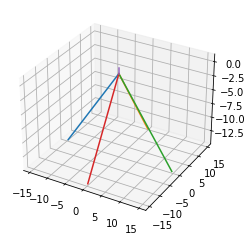

In [29]:
def sig_vis2(list, ax, n):
    for i in range(1, 5):
        figure = ax.plot([list[0][0], list[i][0]], [list[0][1], list[i][1]], [list[0][2], list[i][2]])
    figure = ax.plot([n[0], list[0][0]], [n[1], list[0][1]], [n[2], list[0][2]])
        
def vis2(lst, n):
    fig = plt.figure(1)  
    ax = fig.gca(projection='3d')
    for element in lst:
        sig_vis2(element, ax, n) 
    plt.show()

if __name__ == '__main__':
    COM, lg1, lg2, lg3, lg4, n = input_coord(radius = 30, sigma = 1)
    vis2([[COM, lg1, lg2, lg3, lg4]], n)